# Mapping the number of Gaia transits over the sky

In [1]:
from astroquery.gaia import Gaia
Gaia.ROW_LIMIT = -1 #default is 50 rows max, -1 for unlimited

In [2]:
%%time
data = []
for table in ['gaiadr2.gaia_source','gaiadr3.gaia_source']:
    print('Querying',table)

    keyword = 'astrometric_matched_transits'
    if 'dr2' in table:
        keyword = 'astrometric_matched_observations'

    query_string = f"""select position, count(*) as n, MAX({keyword}) as nbTransits
        from ( 
            select {keyword},
            GAIA_HEALPIX_INDEX(6, source_id) as position 
            FROM {table}
            WHERE phot_g_mean_mag<11
        )  as subquery    
    GROUP BY position
    ORDER BY position
    """
    print(query_string)
    
    job = Gaia.launch_job_async(query_string)
    t = job.get_data()
    data.append(t)

Querying gaiadr2.gaia_source
select position, count(*) as n, MAX(astrometric_matched_observations) as nbTransits
        from ( 
            select astrometric_matched_observations,
            GAIA_HEALPIX_INDEX(6, source_id) as position 
            FROM gaiadr2.gaia_source
            WHERE phot_g_mean_mag<11
        )  as subquery    
    GROUP BY position
    ORDER BY position
    
INFO: Query finished. [astroquery.utils.tap.core]
Querying gaiadr3.gaia_source
select position, count(*) as n, MAX(astrometric_matched_transits) as nbTransits
        from ( 
            select astrometric_matched_transits,
            GAIA_HEALPIX_INDEX(6, source_id) as position 
            FROM gaiadr3.gaia_source
            WHERE phot_g_mean_mag<11
        )  as subquery    
    GROUP BY position
    ORDER BY position
    
INFO: Query finished. [astroquery.utils.tap.core]
CPU times: user 5.09 s, sys: 211 ms, total: 5.3 s
Wall time: 1min 22s


Text(0.5, 0.98, 'Number of transits used in astrometric solution')

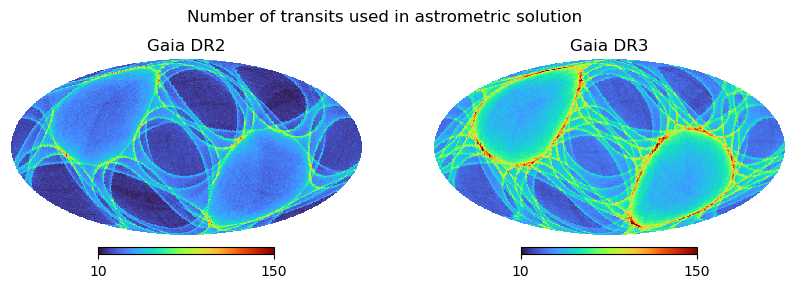

In [3]:
import healpy as hp
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,3))

for iii,t in enumerate(data):
    ax = fig.add_subplot(1,2,iii+1)
    hp.mollview(t['nbTransits'],coord=['Celestial','Galactic'],nest=True,
            title=f'Gaia DR{iii+2}', notext=True,
            min=10,max=150, hold=True, cmap='turbo')
plt.suptitle('Number of transits used in astrometric solution')